In [1]:
#necessary imports
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium

In [5]:
df = pd.read_csv("lacrimedata2.csv")

In [6]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

In [ ]:
df.to_csv("lacrimedata4.csv")

In [4]:
#drop unnecessary columns
columns = [0, 6, 7, 8, 14, 19, 20, 21, 22, 23, 24,  25]
df.drop(df.columns[columns], axis = 1, inplace = True)

In [5]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,NaN,AA,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,NaN,IC,34.1576,-118.4387
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,NaN,IC,34.0944,-118.3277


In [6]:
df["AREA"].unique()

array([ 7,  1,  3,  9,  6, 18, 13, 19,  2, 10,  8, 20,  4, 21, 11, 12, 14,
       15,  5, 16, 17], dtype=int64)

In [7]:
df["AREA NAME"].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Hollenbeck', 'Topanga', 'Northeast',
       '77th Street', 'Pacific', 'N Hollywood', 'Harbor', 'Foothill',
       'Devonshire'], dtype=object)

In [8]:
df["Vict Descent"].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'C', 'K', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [9]:
#group nationalities under the same race/ethnicity
df["Vict Descent"].replace({"A" : "Asian",
                            "C" : "Asian",
                            "D" : "Asian",
                            "F" : "Asian",
                            "J" : "Asian",
                            "K" : "Asian",
                            "L" : "Asian",
                            "V" : "Asian",
                            "B" : "Black",
                            "H" : "Hispanic/Latino",
                            "W" : "White",
                            "I" : "American Indian/Alaskan Native",
                            "G" : "Pacific Islander/Native Hawaiian",
                            "P" : "Pacific Islander/Native Hawaiian",
                            "S" : "Pacific Islander/Native Hawaiian",
                            "U" : "Pacific Islander/Native Hawaiian",
                            "Z" : "Asian Indian",
                            "O" : "Other",
                            "X" : "Unknown",
                           "-" : "Unknown"}, inplace = True)

In [10]:
#convert column to datetime
df["DATE OCC"] = df["DATE OCC"].astype("datetime64[ns]")

In [11]:
#get year, month, and day of each incident
df["year"] = df["DATE OCC"].dt.year
df["month"] = df["DATE OCC"].dt.month
df["day"] =  df["DATE OCC"].dt.day

In [12]:
df["month"].value_counts()

month
10    67105
7     66716
8     66302
5     65053
6     64728
12    64612
1     64513
9     63749
11    63124
3     62807
4     61873
2     60568
Name: count, dtype: int64

In [13]:
#time is in military time; group by hour
df["hour"] = (df["TIME OCC"]//100)


In [14]:
#drop 2024 since data is incomplete
df = df.drop(df.loc[df["year"] == 2024].index)

In [15]:
#replace labels for victim sex
df["Vict Sex"] = df["Vict Sex"].replace({"M" : "Male",
                                         "F" : "Female",
                                         "X" : "Unknown",
                                         "H" : "Unknown"})

In [16]:
#0 represents unknown; source data does not clarify the meaning of negative ages, and unsure about the 120 year old; will
#not include these data points in graphs/charts involving age
df["Vict Age"].unique()

array([  0,  47,  19,  28,  41,  25,  27,  24,  26,   8,   7,  13,  56,
        22,  23,  31,  30,  57,  12,  46,  51,  37,  20,  29,  33,  34,
        15,  65,  59,   9,  35,  -2,  50,  64,  79,  40,  44,  32,  16,
        21,  42,   6,  72,  10,  60,  36,  18,  17,   5,  39,  62,  58,
        63,  14,  71,  69,  49,  38,  61,  43,  45,  78,  67,  53,  54,
        11,  48,  73,  52,  68,  81,  80,   3,  55,  89,  70,  77,  83,
        91,  82,  75,  76,  74,  -1,   2,  66,  84,   4,  -3,  87,  86,
        85,  90,  99,  96,  88,  92,  94,  93,  95,  97,  98, 120,  -4],
      dtype=int64)

In [17]:
#create age columns for victims over 0 and under 100
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

df['age_category'] = pd.cut(df['Vict Age'], bins=bins, labels=labels)

In [18]:
#change datatypes for graphing purposes
df["hour"] = df["hour"].astype(int)
df["year"] = df["year"].astype(str)
df["month"] = df["month"].astype(int)

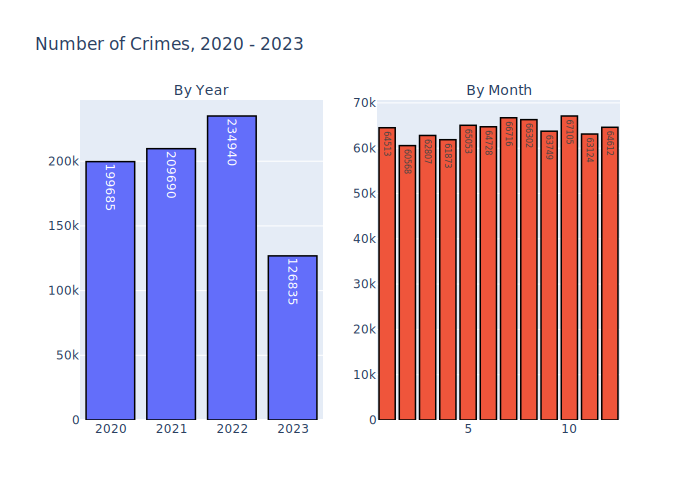

In [21]:
#number of crimes by year and month
df_year = df.groupby(by="year")["Date Rptd"].count().to_frame().reset_index()
df_month = df.groupby(by="month")["Date Rptd"].count().to_frame().reset_index().sort_values(by="month")
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ["By Year", "By Month", "By Hour"])

fig.add_trace(go.Bar(x = df_year["year"], y = df_year["Date Rptd"], text = df_year["Date Rptd"] ), row = 1, col = 1)

fig.add_trace(go.Bar(x = df_month["month"], y = df_month["Date Rptd"], text = df_month["Date Rptd"] ), row = 1, col = 2)


fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5, showlegend = False,  hovertemplate = "<b>Crime Count<b>: %{y}<br>"
                                                                                                              "<extra></extra>")

fig.update_layout(title_text = "Number of Crimes, 2020 - 2023")

fig.update_annotations(font_size=14)
fig.show()

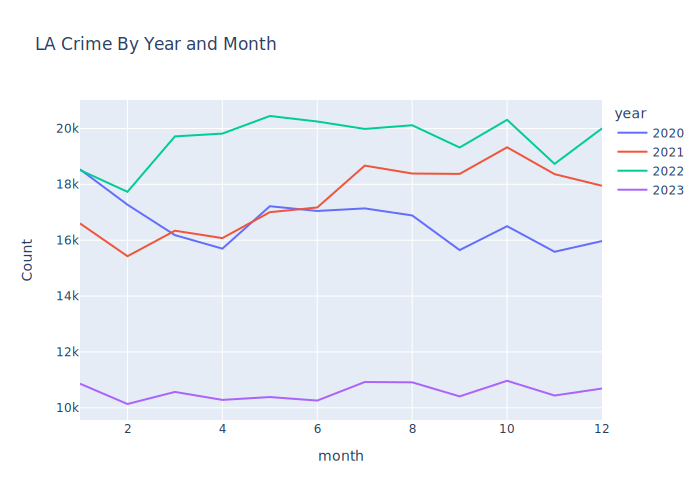

In [22]:
df_years = df.groupby(by =["year", "month"])["Date Rptd"].count().to_frame().reset_index()
df_years = df_years.rename(columns = {"Date Rptd" : "Count"})
fig = px.line(df_years, x = "month", y = "Count" , color = "year", title = "LA Crime By Year and Month")
fig.update_traces(hovertemplate = "<b>Month<b>: %{x}<br>"
                                  "<b>Crime Count<b>: %{y}<br>"
                                   "<extra></extra>")
fig.show()

Crimes increased each year from 2020 to 2022, perhaps due to easing COVID restrictions. Crime dropped significantly in 2023.
Will need to do further research to determine if there was an error or change in data collections.

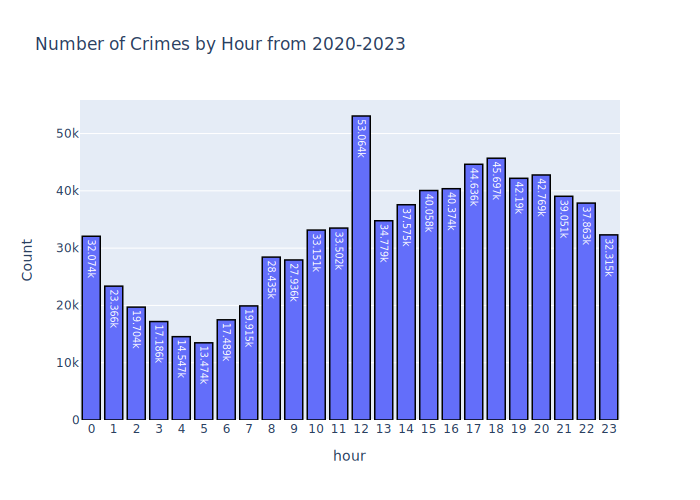

In [23]:
#number of crimes per hour (military time)
df_hour = df.groupby(by="hour")["Date Rptd"].count().to_frame().reset_index()
df_hour = df_hour.rename(columns = {"Date Rptd" : "Count"})
fig = px.bar(df_hour, x = "hour", y = "Count", text_auto = True, title = "Number of Crimes by Hour from 2020-2023")
fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5, hovertemplate = "<b>Hour<b>: %{x}<br>"
                                                                                         "<b>Crime Count<b>: %{y}<br>"
                                                                                         "<extra></extra>")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)
fig.show()

Crime peaks at noon and is higher during the afternoon and evening than late night and early mornings.

C:\Users\adaml\AppData\Local\Temp\ipykernel_3872\795751531.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



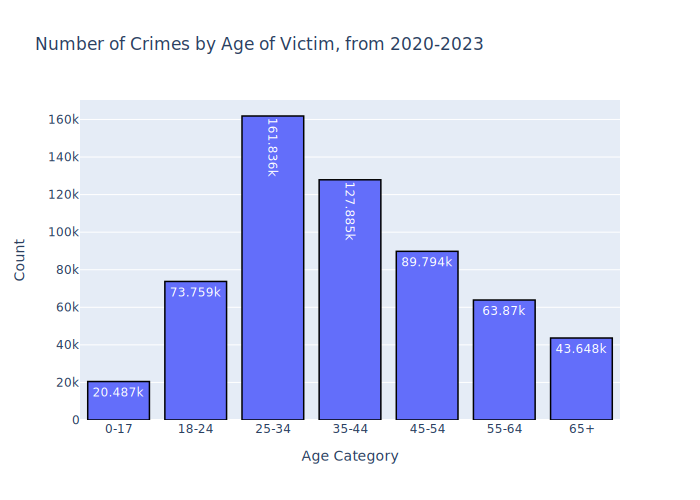

In [24]:
df_age = df.groupby(by="age_category")["Date Rptd"].count().to_frame().reset_index()
df_age = df_age.rename(columns = {"Date Rptd" : "Count", "age_category" : "Age Category"})
fig = px.bar(df_age, x = "Age Category", y = "Count", text_auto = True, title = "Number of Crimes by Age of Victim, from 2020-2023")
fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5, hovertemplate = "<b>Age Range<b>: %{x}<br>"
                                                                                         "<b>Crime Count<b>: %{y}<br>"
                                                                                         "<extra></extra>")
fig.show()

25-34 are the largest age group for victims.

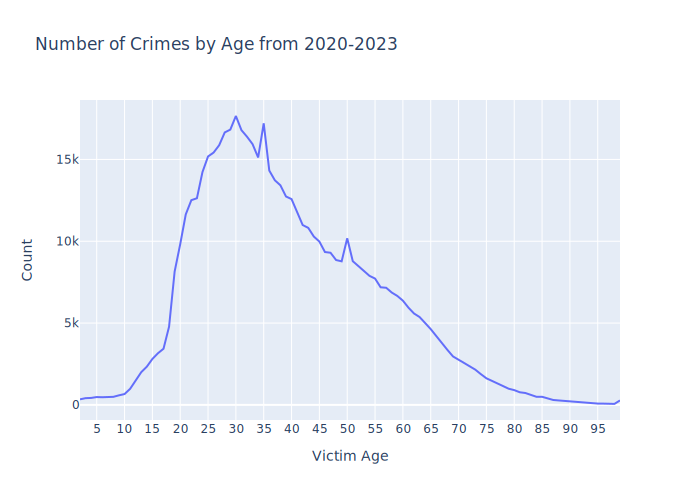

In [25]:
df_allage = df.groupby(by="Vict Age")["Date Rptd"].count().to_frame().reset_index()
df_allage = df_allage.rename(columns = {"Vict Age" : "Victim Age", "Date Rptd" : "Count"})
df_allage = (df_allage.loc[(df_allage["Victim Age"] > 0) & (df_allage["Victim Age"] < 100)])
fig = px.line(df_allage, x = "Victim Age", y = "Count", title = "Number of Crimes by Age from 2020-2023")
fig.update_traces(hovertemplate = "<b>Victim Age<b>: %{x}<br>"
                                  "<b>Crime Count<b>: %{y}<br>"
                                  "<extra></extra>")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 5
    ))
fig.show()

Ages 30 and 35 are the most common ages for victims. There is a big spike from late teens to early 20s. After 35, 
the numbers decrease again before spiking again at 50.

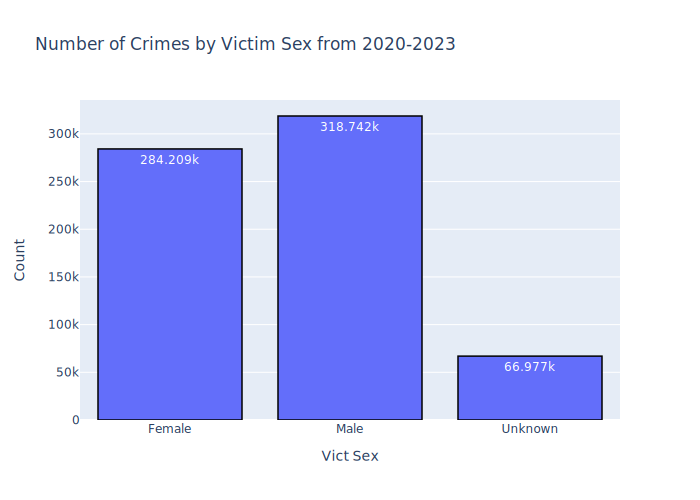

In [26]:
df_sex = df.groupby(by="Vict Sex")["Date Rptd"].count().to_frame().reset_index()
df_sex = df_sex.rename(columns = {"Date Rptd" : "Count"})
fig = px.bar(df_sex, x = "Vict Sex", y = "Count", text_auto = True, title = "Number of Crimes by Victim Sex from 2020-2023")
fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5, hovertemplate = "<b>Sex<b>: %{x}<br>"
                                                                                          "<b>Crime Count<b>: %{y}<br>"
                                                                                          "<extra></extra>")
fig.show()

Males make up a greater percentage of crime victims than females.

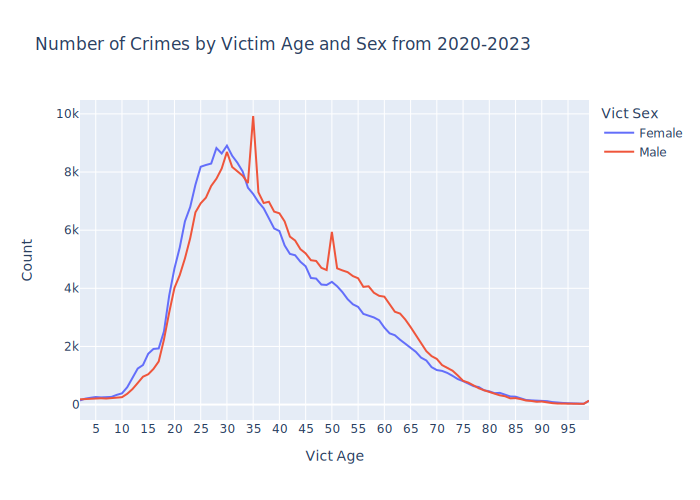

In [27]:
df_allage2 = df.groupby(by=["Vict Age", "Vict Sex"])["Date Rptd"].count().to_frame().reset_index()
df_allage2 = df_allage2.rename(columns = {"Date Rptd" : "Count"})
df_allage2 = (df_allage2[df_allage2["Vict Age"] > 0])
sexes = ["Male", "Female"]
df_allage2 = df_allage2[df_allage2["Vict Sex"].isin(sexes)]
fig = px.line(df_allage2, x = "Vict Age", y = "Count", color = "Vict Sex", title = "Number of Crimes by Victim Age and Sex from 2020-2023")
fig.update_traces(hovertemplate = "<b>Victim Age<b>: %{x}<br>"
                                  "<b>Crime Count<b>: %{y}<br>"
                                  "<extra></extra>")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 5
    ))
fig.show()

From ages 10 to early 30s, more crimes are committed against females than males. Males spike at 35 and remain higher than
females until around 75. 

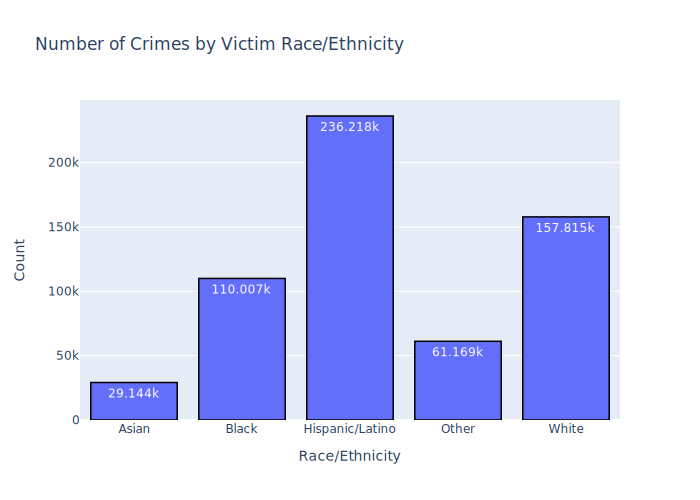

In [28]:
df_race = df.groupby(by="Vict Descent")["Date Rptd"].count().to_frame().reset_index()
df_race = df_race.rename(columns = {"Vict Descent" : "Race/Ethnicity", "Date Rptd" : "Count"})
races = ["Asian", "Black", "Hispanic/Latino", "White", "Other"]
df_race = df_race[df_race["Race/Ethnicity"].isin(races)]
fig = px.bar(df_race, x = "Race/Ethnicity", y = "Count", title = "Number of Crimes by Victim Race/Ethnicity", text_auto = True)
fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5)
fig.show()

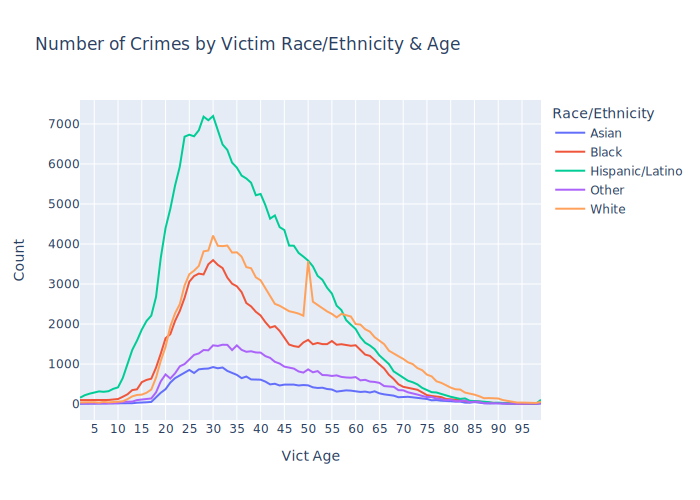

In [29]:
df_allage3 = df.groupby(by=["Vict Age", "Vict Descent"])["Date Rptd"].count().to_frame().reset_index()
df_allage3 = df_allage3.rename(columns = {"Date Rptd" : "Count", "Vict Descent" : "Race/Ethnicity"})
df_allage3 = (df_allage3[df_allage3["Vict Age"] > 0])
races = ["Asian", "Black", "Hispanic/Latino", "White", "Other"]
df_allage3 = df_allage3[df_allage3["Race/Ethnicity"].isin(races)]
fig = px.line(df_allage3, x = "Vict Age", y = "Count", color = "Race/Ethnicity", title = "Number of Crimes by Victim Race/Ethnicity & Age")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 5
    ))
fig.show()

Hispanics makes up the largest number of victims after 58, when they are overtaken by white victims. White victims experience at big spike at 50.
Black victims make up the second largest number of victims until age 20, when they are surpassed by white victims.

*Look more into population demographics to determine how proportionate the numbers are.


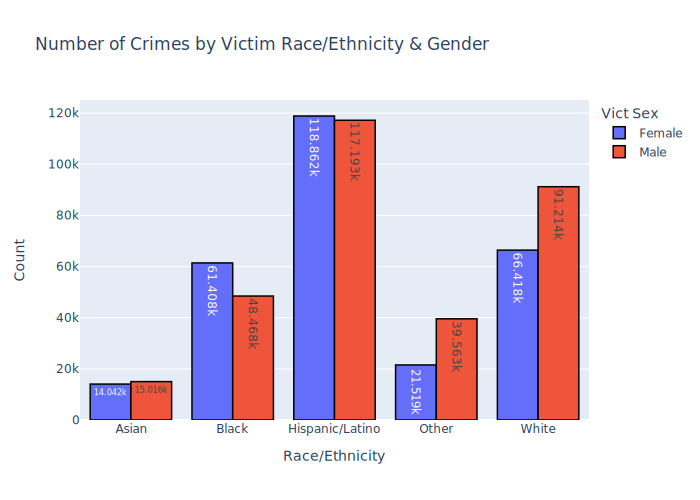

In [30]:
races = ["Asian", "Black", "Hispanic/Latino", "White", "Other"]
sexes = ["Male", "Female"]
df_race_gender = df.groupby(by=["Vict Sex", "Vict Descent"])["Date Rptd"].count().to_frame().reset_index()
df_race_gender = df_race_gender.rename(columns = {"Vict Descent" : "Race/Ethnicity", "Date Rptd" : "Count"})
df_race_gender = df_race_gender[df_race_gender["Vict Sex"].isin(sexes)]
df_race_gender = df_race_gender[df_race_gender["Race/Ethnicity"].isin(races)]
fig = px.bar(df_race_gender, x = "Race/Ethnicity", y = "Count", color = "Vict Sex", barmode = "group", title = "Number of Crimes by Victim Race/Ethnicity & Gender", text_auto = True)
fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5)
fig.show()

Male and female victims are split fairly evenly among Asians and Hispanic victims, with Asians haveing slighly more male victims,
and Hispanics having slighly more female victims. Among "Other" and "White" victims, males make up a much larger number of victims, 
while among Black victims, females make up a greater number of victims. 

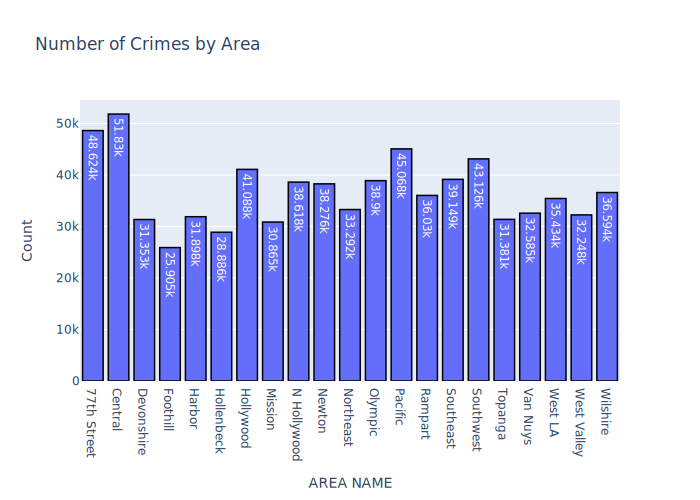

In [31]:
df_area = df.groupby(by="AREA NAME")["Date Rptd"].count().to_frame().reset_index()
df_area = df_area.rename(columns = {"Date Rptd" : "Count"})
fig = px.bar(df_area, x = "AREA NAME", y = "Count", title = "Number of Crimes by Area", text_auto = True)
fig.update_traces(marker_line_color =  'black', marker_line_width = 1.5)
fig.show()

Central, 77th Street, and Pacific are the areas with the most crime; Foothill, Hollenbeck, and Mission have the least crime.

*Look into population demographics of areas to determine how proportionate the numbers are

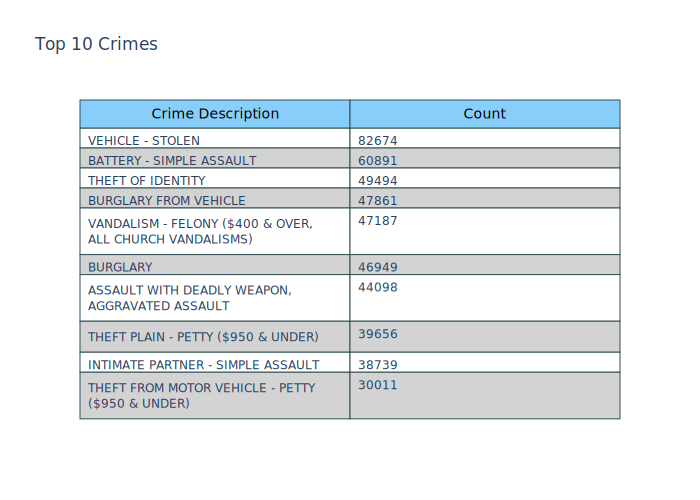

In [33]:
df_crimes = df["Crm Cd Desc"].value_counts().head(10).to_frame().reset_index()
df_crimes = df_crimes.rename(columns = {"Crm Cd Desc" : "Crime Description", "count" : "Count"})
rowOddColor = 'white'
rowEvenColor = 'lightgrey'
fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_crimes.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
        cells=dict(values=[df_crimes["Crime Description"], df_crimes["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
fig.update_layout(title_text = "Top 10 Crimes")
fig.show()

Stolen vehicles and simple assault are the most common crimes.

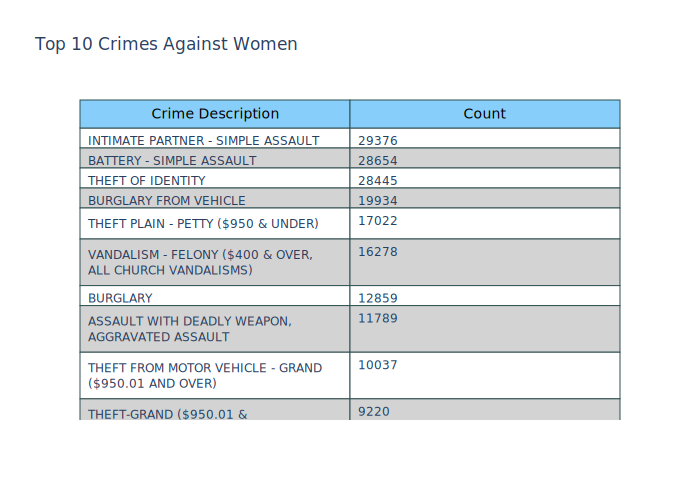

In [34]:
df_crimes_women = df.groupby(by="Vict Sex")["Crm Cd Desc"].value_counts().to_frame().reset_index()
df_crimes_women = df_crimes_women[df_crimes_women["Vict Sex"] == "Female"]
df_crimes_women = df_crimes_women.head(10)
df_crimes_women = df_crimes_women.rename(columns = {"Crm Cd Desc" : "Crime Description", "count" : "Count"})
df_crimes_women = df_crimes_women.drop(columns = "Vict Sex", axis = 1)
rowOddColor = 'white'
rowEvenColor = 'lightgrey'
fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_crimes_women.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
        cells=dict(values=[df_crimes_women["Crime Description"], df_crimes_women["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
fig.update_layout(title_text = "Top 10 Crimes Against Women")
fig.show()

Partner violence is the most common crime against women.

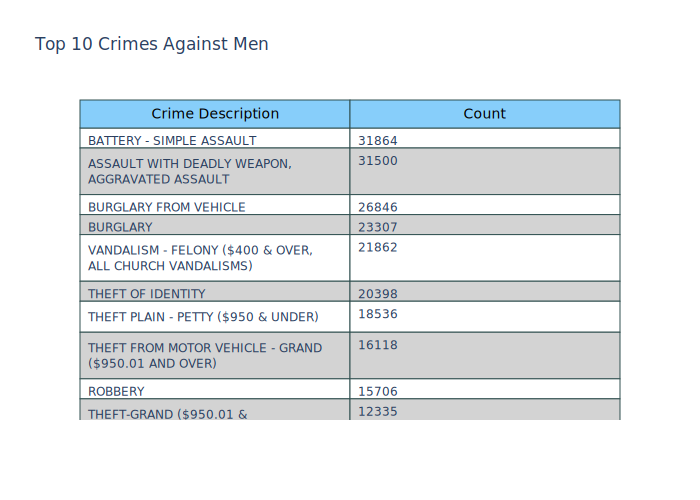

In [35]:
df_crimes_men = df.groupby(by="Vict Sex")["Crm Cd Desc"].value_counts().to_frame().reset_index()
df_crimes_men = df_crimes_men[df_crimes_men["Vict Sex"] == "Male"]
df_crimes_men = df_crimes_men.head(10)
df_crimes_men = df_crimes_men.rename(columns = {"Crm Cd Desc" : "Crime Description", "count" : "Count"})
df_crimes_men = df_crimes_men.drop(columns = "Vict Sex", axis = 1)
rowOddColor = 'white'
rowEvenColor = 'lightgrey'
fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_crimes_men.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
        cells=dict(values=[df_crimes_men["Crime Description"], df_crimes_men["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
fig.update_layout(title_text = "Top 10 Crimes Against Men")
fig.show()

Simple assault is the most common crime against men.

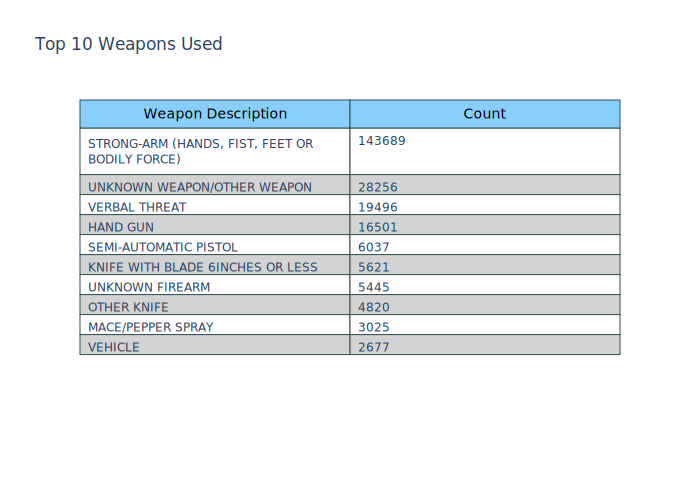

In [36]:
df_weapon = df["Weapon Desc"].value_counts().head(10).to_frame().reset_index()
df_weapon = df_weapon.rename(columns = {"Weapon Desc" : "Weapon Description", "count" : "Count"})
rowOddColor = 'white'
rowEvenColor = 'lightgrey'
fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_weapon.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
        cells=dict(values=[df_weapon["Weapon Description"], df_weapon["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
fig.update_layout(title_text = "Top 10 Weapons Used")
fig.show()

In [37]:
def crimes_by_age(age_category):
    data = df.groupby(by="age_category")["Crm Cd Desc"].value_counts().to_frame().reset_index()
    data = data[data["age_category"] == age_category]
    data = data.head(10)
    data = data.rename(columns = {"Crm Cd Desc" : "Crime Description", "count" : "Count"})
    data = data.drop(columns = "age_category", axis = 1)
    rowOddColor = 'white'
    rowEvenColor = 'lightgrey'
    fig = go.Figure(data=[go.Table(
            header=dict(values=list(data.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
            cells=dict(values=[data["Crime Description"], data["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
    fig.update_layout(title_text = "Top 10 Crimes Against " + age_category + " Year Olds")
    fig.show()
    

Above is a function to show the top 10 crimes by age of victim.

C:\Users\adaml\AppData\Local\Temp\ipykernel_3872\3881102189.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



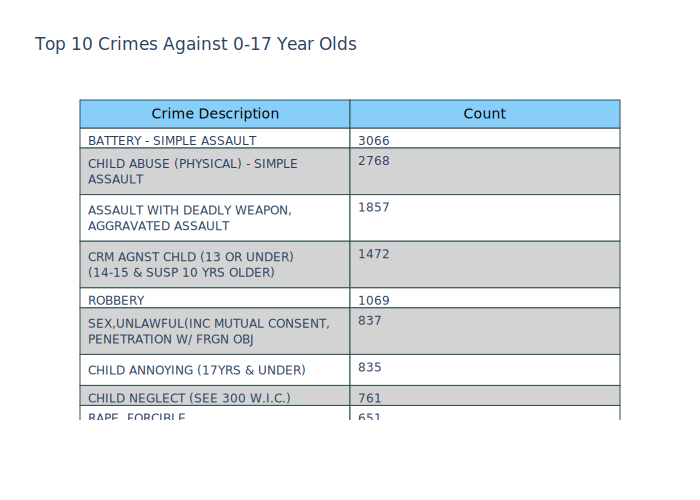

In [38]:
crimes_by_age("0-17")

The crimes against minors differ from the most common crimes against all victims.

In [39]:
def crimes_by_race(race):
    data = df.groupby(by="Vict Descent")["Crm Cd Desc"].value_counts().to_frame().reset_index()
    data = data[data["Vict Descent"] == race]
    data = data.head(10)
    data = data.rename(columns = {"Crm Cd Desc" : "Crime Description", "count" : "Count"})
    data = data.drop(columns = "Vict Descent", axis = 1)
    rowOddColor = 'white'
    rowEvenColor = 'lightgrey'
    fig = go.Figure(data=[go.Table(
            header=dict(values=list(data.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
            cells=dict(values=[data["Crime Description"], data["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
    fig.update_layout(title_text = "Top 10 Crimes Against " + race + " Victims")
    fig.show()
    

Above is a function to show the top 10 crimes by race/ethnicity of vicitim.

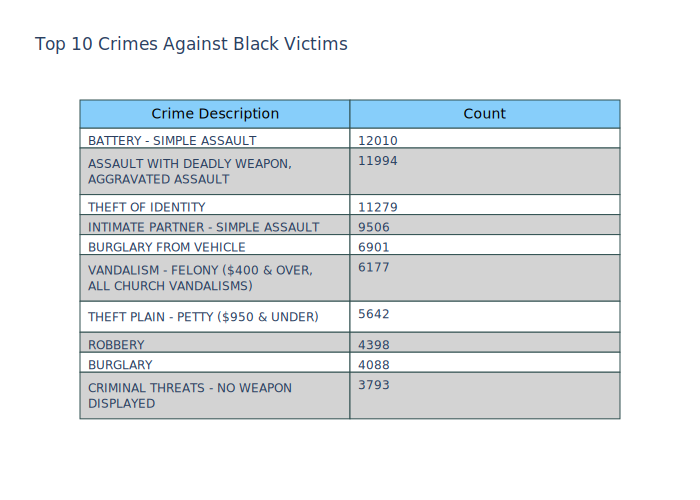

In [40]:
crimes_by_race("Black")

In [41]:
def crimes_by_area(area_name):
    data = df.groupby(by="AREA NAME")["Crm Cd Desc"].value_counts().to_frame().reset_index()
    data = data[data["AREA NAME"] == area_name]
    data = data.head(10)
    data = data.rename(columns = {"Crm Cd Desc" : "Crime Description", "count" : "Count"})
    data = data.drop(columns = "AREA NAME", axis = 1)
    rowOddColor = 'white'
    rowEvenColor = 'lightgrey'
    fig = go.Figure(data=[go.Table(
            header=dict(values=list(data.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
            cells=dict(values=[data["Crime Description"], data["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
    fig.update_layout(title_text = "Top 10 Crimes in " + area_name)
    fig.show()

Above is a function to show the top 10 crimes by area.

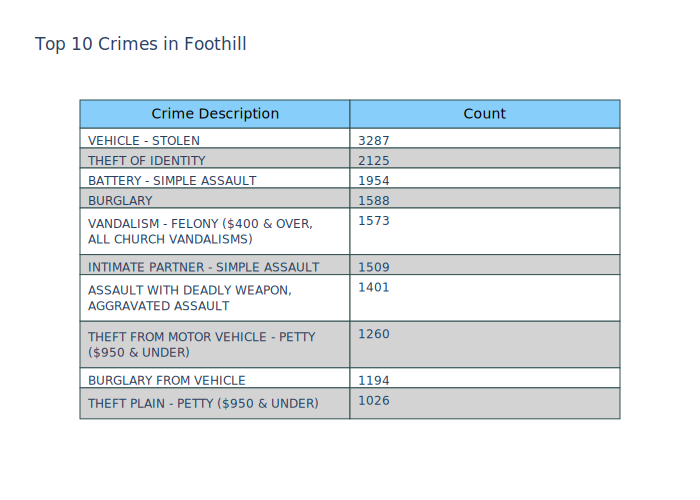

In [42]:
crimes_by_area("Foothill")

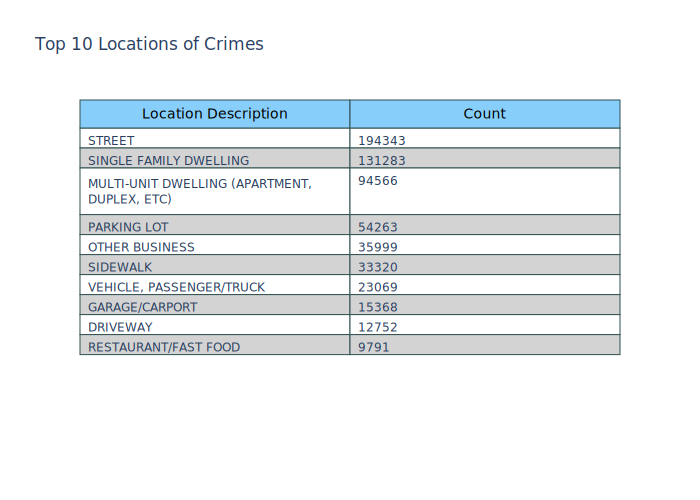

In [43]:
df_premise = df["Premis Desc"].value_counts().head(10).to_frame().reset_index()
df_premise = df_premise.rename(columns = {"Premis Desc" : "Location Description", "count" : "Count"})
rowOddColor = 'white'
rowEvenColor = 'lightgrey'
fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_premise.columns),
                    fill_color='lightskyblue',
                    line_color='darkslategray',
                    font=dict(color='black', size=14)),
        cells=dict(values=[df_premise["Location Description"], df_premise["Count"]],
                   line_color='darkslategray',
                   fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor, rowEvenColor]*10],
                   align='left'))])
fig.update_layout(title_text = "Top 10 Locations of Crimes")
fig.show()

In [44]:
def area_hour(area_name):
    data = df.groupby(by=["AREA NAME", "hour"])["Date Rptd"].count().to_frame().reset_index()
    data = data[data["AREA NAME"] == area_name]
    data = data.rename(columns = {"Date Rptd" : "Count"})
    fig = px.line(data, x = "hour", y = "Count", title = "Number of Crimes over 24 Hours in " + area_name + " Area")
    fig.show()
    

The function above produces a graph to show the number of crimes over a 24 hour period in a given area.

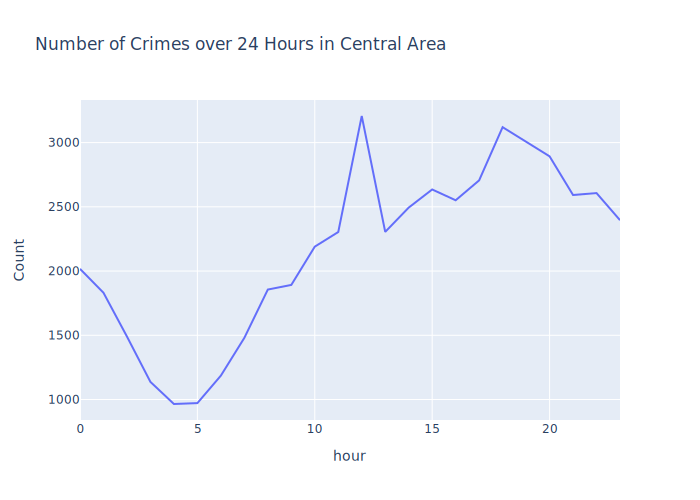

In [45]:
area_hour("Central")

The distribution for Central matches the distribution for all areas.

In [46]:
#most common crime in each area
data = df.groupby(by=["AREA NAME", "Crm Cd Desc"])["Crm Cd Desc"].value_counts().sort_values(ascending=False)
data = data.groupby("AREA NAME").head(1).to_frame()
data
 

,,count
AREA NAME,Crm Cd Desc,
Central,BURGLARY FROM VEHICLE,7186
77th Street,VEHICLE - STOLEN,6317
Newton,VEHICLE - STOLEN,6000
Southeast,VEHICLE - STOLEN,5246
Pacific,VEHICLE - STOLEN,4746
Southwest,VEHICLE - STOLEN,4635
Hollenbeck,VEHICLE - STOLEN,4607
Harbor,VEHICLE - STOLEN,4379
Olympic,VEHICLE - STOLEN,4251


Shows the most common crime in each area.

In [47]:
#most common crime by hour
data = df.groupby(by=["hour", "Crm Cd Desc"])["Crm Cd Desc"].value_counts().sort_values(ascending=False)
data = data.groupby("hour").head(1).to_frame().sort_values(by="hour")
data 

,,count
hour,Crm Cd Desc,
0,THEFT OF IDENTITY,5279
1,VEHICLE - STOLEN,2203
2,BURGLARY,2004
3,BURGLARY,2378
4,BURGLARY,2205
5,VEHICLE - STOLEN,1709
6,THEFT OF IDENTITY,2810
7,VEHICLE - STOLEN,2152
8,THEFT OF IDENTITY,3354


Shows the most common crime by hour. Stealing vehicles is the most common crime from late afternoon to late at night.

In [48]:
df["LON"].mean()

-118.00703879704182

In [49]:
df["LAT"].mean()

33.97379338182375

In [50]:
map = folium.Map(location = [33.9737, -118.0070], zoom_start = 12)

In [48]:
df_crime = df.groupby(by=["AREA NAME", "year"])["Crm Cd Desc"].count().to_frame().reset_index()
def crime_freq(row):
    if row["Crm Cd Desc"] >= df_crime["Crm Cd Desc"].quantile(0.75):
        return "red"
    elif row["Crm Cd Desc"] <= df_crime["Crm Cd Desc"].quantile(0.25):
        return "green"
    else:
        return "yellow"

df_crime["Frequency"] = df_crime.apply (lambda row: crime_freq(row), axis = 1)


In [49]:
df_fol = pd.merge(df_crime, df_map, how = "inner", on = "AREA NAME")

NameError: name 'df_map' is not defined

In [46]:
for i in range(len(df_fol)):
    coords = ((df_fol["LAT"][i]), float(df_fol["LON"][i]))
    tooltip =  "\nArea: " + df_fol["AREA NAME"][i] + "\nNumber of Crimes:" + str(df_fol["Crm Cd Desc"][i])
    folium.Circle(location=coords,
                 radius = 700,
                 color = df_fol["Frequency"][i],
                 fill = True,
                 fill_color = df_fol["Frequency"][i],
                 tooltip = tooltip).add_to(map)

In [47]:
map

The map above shows a marker representing the mean latitude and longitude of crimes committed in that area. Red markers indicate high
crimes areas, yellow markers represent medium crime areas, and green markers represent relatively low crime areas. Hovering over
the marker shows the area name and number of crimes. This represents all crime from 2020 to 2023.

Next Steps:
*In addition to notes already listed, group crimes by type to analyze violent crime trends in areas